# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT, PER, WTR, LIQ, TDF, HANA, FCTR, KRX


In [5]:
PM.review_portfolio('WTR')

{'strategy': 'WTR', 'universe': 'UV_WTR'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR', strategy=True)

{'method_select': 'Selected',
 'method_weigh': 'Equally',
 'file': 'pf_wtr_static',
 'path': 'transaction'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [11]:
k200 = PM.create_universe('UV_K200')

201 securities from 2021-01-04 to 2024-12-02 uploaded.
Price data loaded


In [12]:
k200.portfolio_data
#k200.get_names()

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'tickers': 'KRX/INDEX/STOCK/1028',
   'daily': True,
   'path': 'data'},
  'name': 'UV_K200'}}

In [26]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2021-01-04 to 2024-12-13 downloaded.
kospi200_prices_241213.csv saved
df_prices updated
Execution time of download: 29.68 secs


## KRX

In [14]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [17]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded


In [18]:
wtr.get_names()

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 379800: KODEX 미국S&P500TR
3) 411060: ACE KRX금현물
4) 148070: KOSEF 국고채10년
5) 284430: KODEX 200미국채혼합

In [19]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [20]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

In [21]:
#wtr.save()

## FCTR

In [22]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
df_prices loaded


In [23]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [24]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

## FUND

In [4]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded


In [5]:
kw = dict(
    n_years=20, 
    close_today = WidgetUniverse.values(1),
    #tickers='selected'
)
fund.download(**kw) if WidgetUniverse.values(0) else None

In [6]:
fund.portfolio_data['universe']

{'data': {'universe': 'fund',
  'file': 'funds_prices',
  'tickers': 'funds_info',
  'daily': False,
  'path': 'data'},
 'name': 'UV_FUND'}

*create transaction_cost*

In [8]:
update = False

fd = FundDownloader.create(fund)
#fd.export_cost('TDF', 'transaction_cost', path=path_tran, update=update)
fd.export_cost('TDF')

Data for 64 funds loaded.


,universe,ticker,buy,sell,fee,tax
0,TDF,K55234DF2657,0.0,0.0,0.410,0.0
1,TDF,K55234DF2459,0.0,0.0,0.410,0.0
2,TDF,K55301DW1763,0.0,0.0,0.000,0.0
3,TDF,K55301BU6139,0.0,0.0,0.600,0.0
4,TDF,K55105BU1161,0.0,0.0,0.420,0.0
...,...,...,...,...,...,...
59,TDF,K55223BT1278,0.0,0.0,0.480,0.0
60,TDF,K55105BT9936,0.0,0.0,0.540,0.0
61,TDF,K55223BT1096,0.0,0.0,0.360,0.0
62,TDF,K55301BU6113,0.0,0.0,0.570,0.0


## LIQ

In [9]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [10]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2021-01-04 to 2024-11-28 uploaded.
df_prices loaded


In [11]:
#liq.get_names()

In [12]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

## Additional Data

### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [6]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

In [7]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [8]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Ratio: 2023-01-02 ~ 2024-11-19
Price: 2021-01-04 ~ 2024-12-02


# Performance

In [4]:
PM.review()

Portfolio: MMT, PER, WTR, LIQ, TDF, HANA, FCTR, KRX


In [5]:
pf_list = ['MMT', 'PER', 'WTR']
pm = PM(pf_list)

MMT:
200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded

PER:
200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded

WTR:
6 securities from 2021-01-04 to 2024-12-02 uploaded.
Price data loaded
Transaction record to 2024-11-20 loaded



In [20]:
#pm.load('LIQ')
pm.load(['TDF','HANA'])

TDF:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-06-19 loaded

HANA:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



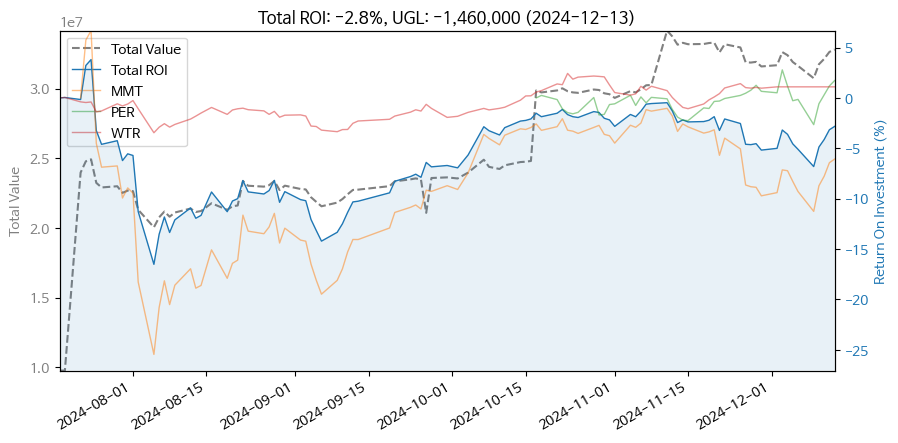

In [6]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date, roi=False)
pm.plot(start_date=start_date)

In [7]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [8]:
pm.valuate(date=w_date.value)

,MMT,PER,WTR,Total
start,2024-07-22,2024-10-17,2024-07-18,2024-07-18
date,2024-12-13,2024-12-13,2024-12-02,2024-12-13
buy,29349501,12249820,10049835,51649156
sell,14322250,2621865,437755,17381870
value,13245200,9839290,9722580,32807070
UGL,-1782051,211335,110500,-1460216
ROI,-0.060718,0.017252,0.010995,-0.028272


# Transaction

## MMT

In [9]:
pf_mmt = PM.create_portfolio('MMT', cost=file_cost)

200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [20]:
_ = pf_mmt.update_record()

Transaction file pf_k200_momentum_241125.csv updated
self.record updated


In [11]:
#pf_mmt.portfolio_data['strategy']

In [21]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2024-11-11 267260   HD현대일렉트릭  390000            0    8     0.2    0.212   
           012450  한화에어로스페이스  403500           -1    6     0.2    0.192   
           079550     LIG넥스원  266000            0   11     0.2    0.199   
           003230       삼양식품  563000           -1    5     0.2    0.191   
           064350       현대로템   63300           48   48     0.2    0.206   
           011790        SKC  122145          -19    0     NaN    0.000   
2024-11-25 267260   HD현대일렉트릭  386500           -2    6     0.2    0.186   
           012450  한화에어로스페이스  359000            0    7     0.2    0.202   
           003230       삼양식품  521000            0    5     0.2    0.209   
           079550     LIG넥스원  223000            0   11     0.2    0.197   
           000150         두산  213500           12   12     0.2    0.206   
           064350       현대로템   60000          -48    0     0.0    0.000   

                       date*  
date       ticker             
2024-11-11 267260 2024-11-11  
           012450 2024-11-11  
           079550 2024-11-11  
           003230 2024-11-11  
           064350 2024-11-11  
           011790 2024-11-11  
2024-11-25 267260 2024-11-25  
           012450 2024-11-25  
           003230 2024-11-25  
           079550 2024-11-25  
           000150 2024-11-25  
           064350 2024-11-25

In [22]:
# run after editting record file
#_ = pf_mmt.update_record(save=True)

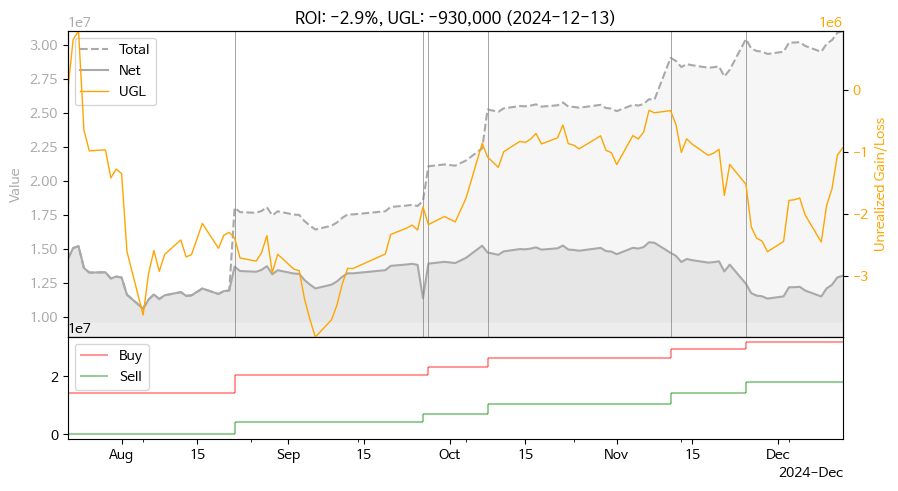

In [23]:
pf_mmt.plot(roi=False)

In [15]:
#pf_mmt.performance(metrics=METRICS)
#pf_mmt.cost
pf_mmt.valuate()

start    2024-07-22
date     2024-12-13
buy        29350569
sell       14295948
value      13245200
UGL        -1809421
ROI       -0.061649
dtype: object

In [16]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [24]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_mmt.view_record(-2, nshares=True)

Liquidation set to None
5 tickers selected by Total return from 2023-12-04 to 2024-12-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 13 %
ROI: -4.6%, UGL: -1,579,000  (2024-12-13)
Set save=True to save transaction record


name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2024-11-25 267260   HD현대일렉트릭   386000           -2    6     0.2    0.186   
           012450  한화에어로스페이스   359500            0    7     0.2    0.202   
           003230       삼양식품   520000            0    5     0.2    0.209   
           079550     LIG넥스원   223999            0   11     0.2    0.198   
           000150         두산   212500           12   12     0.2    0.205   
           064350       현대로템    59000          -48    0     0.0    0.000   
2024-12-09 267260   HD현대일렉트릭   345500            1    7     0.2    0.215   
           010130       고려아연  1535000            1    1     0.2    0.136   
           003230       삼양식품   598000           -1    4     0.2    0.212   
           012450  한화에어로스페이스   279000            2    9     0.2    0.223   
           000150         두산   218500           -1   11     0.2    0.213   
           079550     LIG넥스원   171100          -11    0     0.0    0.000   

                       date*  
date       ticker             
2024-11-25 267260 2024-11-26  
           012450 2024-11-26  
           003230 2024-11-26  
           079550 2024-11-26  
           000150 2024-11-26  
           064350 2024-11-26  
2024-12-09 267260 2024-12-09  
           010130 2024-12-09  
           003230 2024-12-09  
           012450 2024-12-09  
           000150 2024-12-09  
           079550 2024-12-09

## KRX
*simulation*

In [16]:
pf_krx = PM.create_portfolio('KRX')

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded
ERROR from get_names: '287410'
Transaction record to 2024-10-02 loaded


In [17]:
pf_krx.view_record(-2)

name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

ROI -12.86%, Unrealized G/L -4,042,804 on 2024-10-08


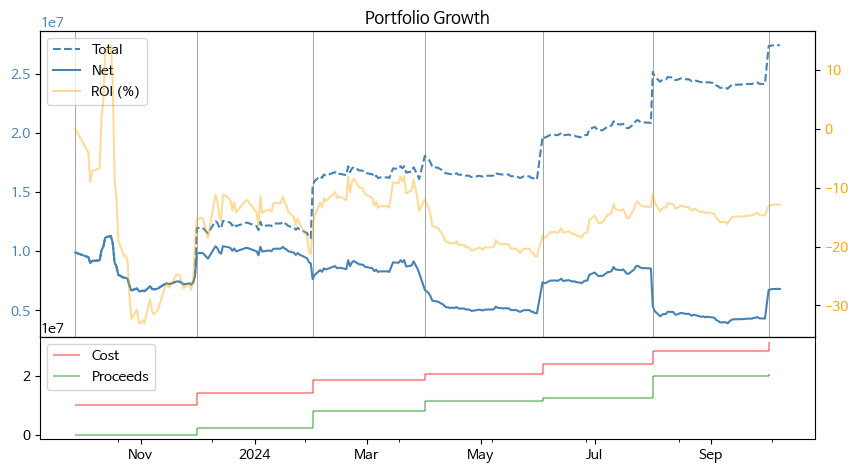

In [18]:
pf_krx.valuate()

In [19]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-09-08 to 2024-09-06
Weights of assets determined by Equal weights.
Mean absolute error of weights: 4 %
ROI -12.80%, Unrealized G/L -4,042,804 on 2024-10-08
Set save=True to save transaction record


name   price  transaction   net weight weight*
date       asset                                                   
2024-10-02 078860  엔에스이엔엠    9700           30   139    0.2     0.2
           016670     디모아    4725          130   286    0.2  0.2004
           033790      피노    9090          148   148    0.2  0.1995
           159910   스킨앤스킨     761          744  1778    0.2  0.2007
           196170    알테오젠  336000            1     4    0.2  0.1993
           089030     테크윙   36500          -21     0    NaN     0.0
2024-10-08 078860    None    9390            6   145  0.200  0.2079
           016670    None    4865           -6   280  0.200  0.2080
           033790    None    9040            2   150  0.200  0.2070
           196170    None  369000           -1     3  0.200  0.1690
           159910    None     734           79  1857  0.200  0.2081

## PER

In [14]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [19]:
pf_per = PM.create_portfolio('PER', df_additional=df_ratio, **kw_cost)

201 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [16]:
#pf_per.portfolio_data

In [17]:
pf_per.view_record(-2)

name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-10-17 010060   OCI홀딩스   66700           14   14    0.20   0.1892
           003030   세아제강지주  164450            6    6    0.20   0.1999
           009970  영원무역홀딩스   89000           11   11    0.20   0.1983
           016380     KG스틸    6600          154  154    0.20   0.2059
           047040     대우건설    3820          267  267    0.20   0.2066
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [20]:
pf_per.valuate()

start    2024-10-17
date     2024-12-02
buy        12250265
sell        2617050
value       9603980
UGL          -29235
ROI       -0.002386
dtype: object

In [37]:
#pf_per.update_record()
#pf_per.view_record(-2)

Transaction dates updated for profit/loss on the dates


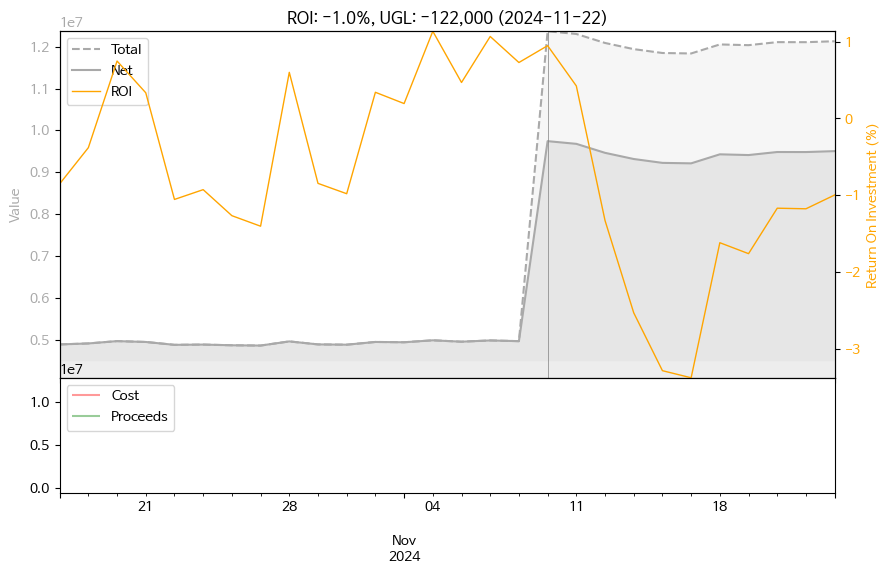

In [38]:
pf_per.plot()

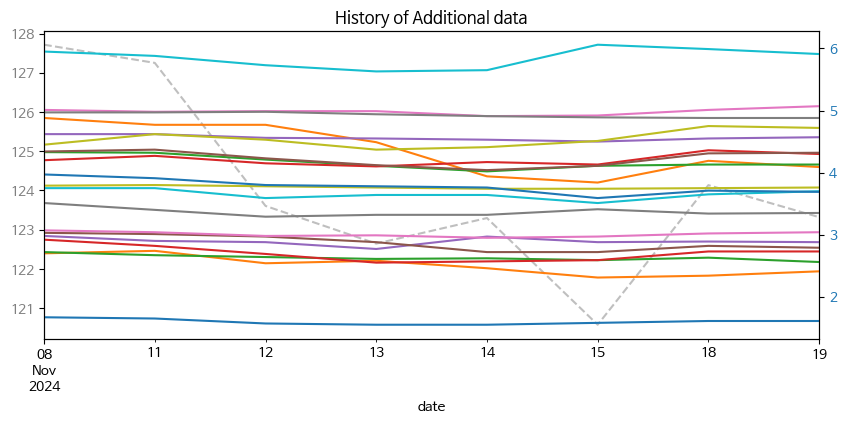

In [39]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

In [40]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [41]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-1)

Liquidation set to None
ERROR: no ratio for "['2024-11-20', '2024-11-21', '2024-11-22'] not in index"


name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [42]:
#pf_per.update_record()

## WTR
*modified all weather*

In [21]:
pf_wtr = PM.create_portfolio('WTR', **kw_cost)

6 securities from 2021-01-04 to 2024-12-02 uploaded.
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-20 loaded


In [22]:
pf_wtr.portfolio_data['strategy']

{'data': {'method_select': 'Selected',
  'method_weigh': 'Equally',
  'file': 'pf_wtr_static',
  'path': 'transaction'},
 'name': 'WTR'}

Transaction dates updated for profit/loss on the dates


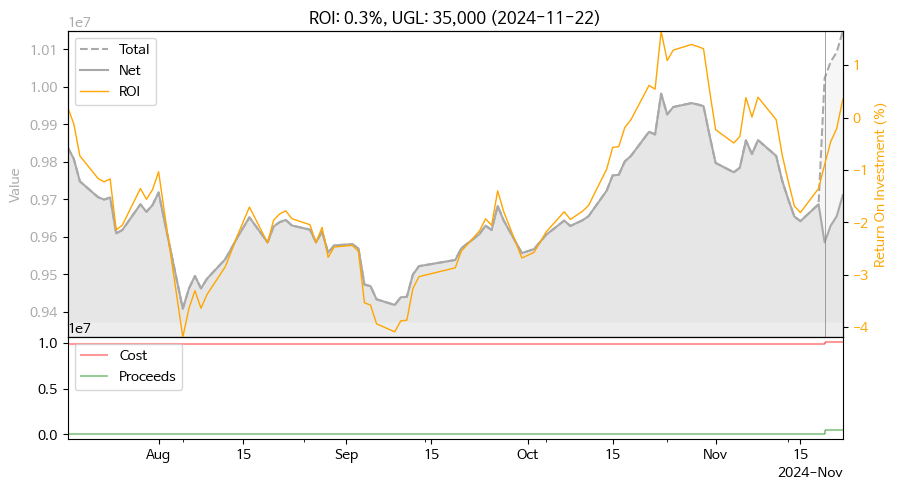

In [5]:
pf_wtr.plot()

In [6]:
pf_wtr.view_record(-2)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-07-18 069500             KODEX 200   39085           42   42   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14   0.167   
           148070          KOSEF 국고채10년  114910           14   14   0.167   
           379800      KODEX 미국S&P500TR   17625           94   94   0.167   
           411060            ACE KRX금현물   15715          106  106   0.167   
           284430        KODEX 200미국채혼합   13440          124  124   0.167   
2024-11-20 069500             KODEX 200   33010            7   49   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14   0.167   
           148070          KOSEF 국고채10년  117035           -1   13   0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86   0.167   
           411060            ACE KRX금현물   17040          -10   96   0.167   
           284430        KODEX 200미국채혼합   12585            5  129   0.167   

                   weight*  
date       ticker           
2024-07-18 069500   0.1670  
           273130   0.1610  
           148070   0.1640  
           379800   0.1690  
           411060   0.1700  
           284430   0.1700  
2024-11-20 069500   0.1684  
           273130   0.1676  
           148070   0.1584  
           379800   0.1680  
           411060   0.1685  
           284430   0.1691

In [7]:
#pf_wtr.performance(metrics=METRICS)

In [8]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [9]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2)

Liquidation set to None
6 tickers selected by All from 2024-05-22 to 2024-11-22
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
Transaction dates updated for profit/loss on the dates
ROI: 0.3%, UGL: 35,000  (2024-11-22)
Set save=True to save transaction record


name   price  transaction  net weight  \
date       ticker                                                          
2024-11-20 069500             KODEX 200   33010            7   49  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114735            0   14  0.167   
           148070          KOSEF 국고채10년  117035           -1   13  0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.167   
           411060            ACE KRX금현물   17040          -10   96  0.167   
           284430        KODEX 200미국채혼합   12585            5  129  0.167   
2024-11-22 069500             KODEX 200   33345           -1   48  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  115170            0   14  0.167   
           379800      KODEX 미국S&P500TR   19030           -1   85  0.167   
           411060            ACE KRX금현물   17350           -3   93  0.167   
           148070          KOSEF 국고채10년  117420            0   13  0.167   
           284430        KODEX 200미국채혼합   12685           -2  127  0.167   

                  weight*  
date       ticker          
2024-11-20 069500  0.1684  
           273130  0.1676  
           148070  0.1584  
           379800   0.168  
           411060  0.1685  
           284430  0.1691  
2024-11-22 069500  0.1670  
           273130  0.1683  
           379800  0.1688  
           411060  0.1684  
           148070  0.1593  
           284430  0.1681

## LIQ

In [49]:
pf_liq = PM.create_portfolio('LIQ')

24 securities from 2021-01-04 to 2024-11-22 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded


Transaction dates updated for profit/loss on the dates


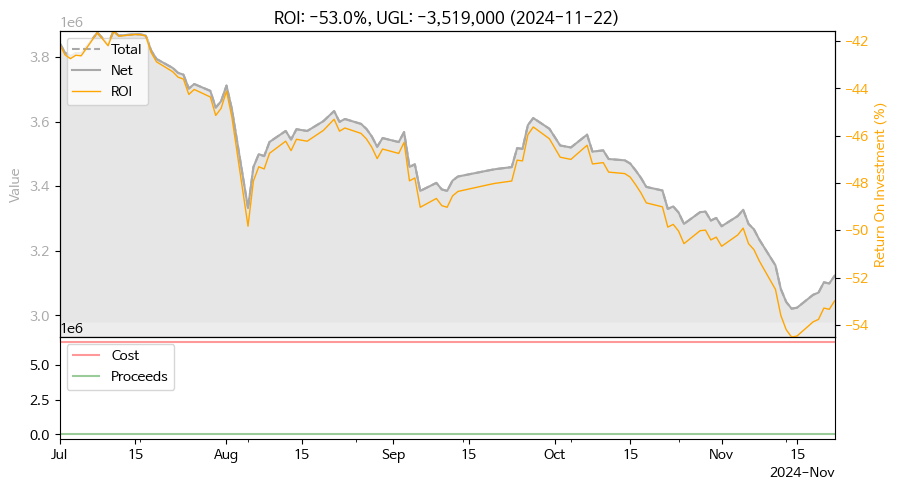

In [50]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [51]:
pf_liq.view_record()

name   price  transaction  net  weight  weight*
date       ticker                                                    
2024-01-03 011780     금호석유  171000            2    2     NaN   0.0515
           066570     LG전자  122500            2    2     NaN   0.0369
           035890     서희건설    1800          166  166     NaN   0.0450
           040420  정상제이엘에스    7970           37   37     NaN   0.0444
           140520     대창스틸    3250           90   90     NaN   0.0440
           072990    에이치시티   15900           18   18     NaN   0.0431
           091580    상신이디피   16800           18   18     NaN   0.0455
           011200      HMM   26350           11   11     NaN   0.0436
           002220     한일철강    3130           95   95     NaN   0.0448
           006650     대한유화  181500            1    1     NaN   0.0273
           136490       선진   12700           23   23     NaN   0.0440
           064550    바이오니아   49650            6    6     NaN   0.0449
           460860     동국제강   18723            8    8     NaN   0.0226
           040910     아이씨디   12200           24   24     NaN   0.0441
           024950   삼천리자전거    9770           30   30     NaN   0.0441
           900070   글로벌에스엠    1080          277  277     NaN   0.0450
           036580      팜스코    6090           49   49     NaN   0.0449
           184230  SGA솔루션즈    1315          228  228     NaN   0.0451
           460850     동국씨엠   18055            5    5     NaN   0.0136
           016250  SGC E&C   46000            6    6     NaN   0.0416
           001230    동국홀딩스   24044            2    2     NaN   0.0072
           049470      SGA    1115          269  269     NaN   0.0452
           217820    원익피앤이   12518           22   22     NaN   0.0415
           109960   AP헬스케어    3790          158  158     NaN   0.0902

## TDF

In [19]:
selected = ['K55301BU6139', 'K55206C95800']

In [20]:
pf_tdf = PM.create_portfolio('TDF', tickers=selected, cost=file_cost)
pf_tdf.view_record()

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-06-19 loaded


name  \
date       ticker                                                    
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   

                         transaction      net  weight  weight*  
date       ticker                                               
2024-06-19 K55301BU6139      5000000  5000000     0.5      0.5  
           K55206C95800      5000000  5000000     0.5      0.5

In [14]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

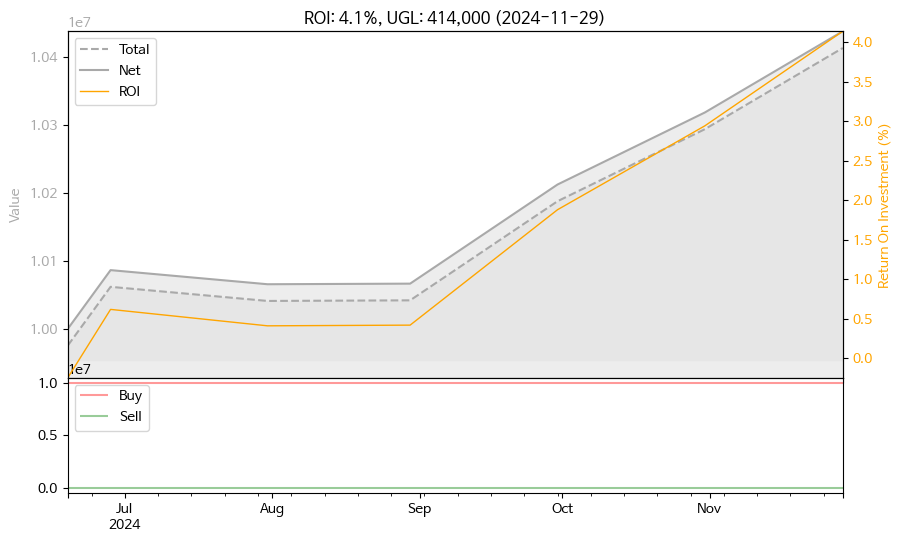

In [21]:
pf_tdf.plot()

In [22]:
pf_tdf.valuate()

start    2024-06-19
date     2024-11-29
buy        10000000
sell         -24592
value      10438108
UGL          413516
ROI        0.041352
dtype: object

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [26]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record()

Liquidation set to None
2 tickers selected by Selected from 2024-11-29 to 2024-11-29
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 4.1%, UGL: 414,000  (2024-11-29)
Set save=True to save transaction record


name  \
date       ticker                                                    
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   
2024-11-29 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   

                         transaction      net  weight  weight*  
date       ticker                                               
2024-06-19 K55301BU6139      5000000  5000000     0.5      0.5  
           K55206C95800      5000000  5000000     0.5      0.5  
2024-11-29 K55301BU6139        51572  5218429     0.5      0.5  
           K55206C95800       -53146  5218104     0.5      0.5

## HANA

In [31]:
selected = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']

In [33]:
pf_hana = PM.create_portfolio('HANA', tickers=selected, cost=file_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-08-01 loaded


name  transaction  \
date       ticker                                                             
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      5020000   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      2420000   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1860000   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce       690000   

                             net  weight  weight*  
date       ticker                                  
2024-08-01 KR5101888398  5020000   0.502   0.5026  
           KR5236AS4826  2420000   0.242   0.2422  
           KR5370AP9956  1860000   0.186   0.1862  
           K55306CV9946   690000   0.069   0.0690

In [34]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

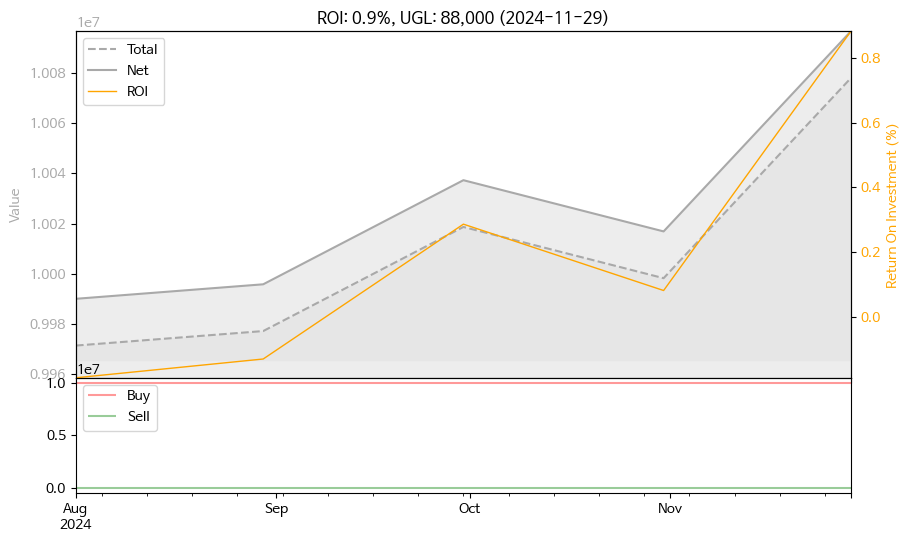

In [35]:
pf_hana.plot()

In [36]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [37]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 tickers selected by Selected from 2022-11-29 to 2024-11-29
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
ROI: 0.8%, UGL: 88,000  (2024-11-29)
Set save=True to save transaction record


name  transaction  \
date       ticker                                                             
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      5020000   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      2420000   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1860000   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce       690000   
2024-11-29 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)       566118   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      -232494   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      -332582   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce        -2966   

                             net  weight  weight*  
date       ticker                                  
2024-08-01 KR5101888398  5020000  0.5020   0.5026  
           KR5236AS4826  2420000  0.2420   0.2422  
           KR5370AP9956  1860000  0.1860   0.1862  
           K55306CV9946   690000  0.0690   0.0690  
2024-11-29 KR5101888398  5686663  0.5633   0.5633  
           KR5236AS4826  2158336  0.2138   0.2138  
           KR5370AP9956  1575484  0.1561   0.1561  
           K55306CV9946   674266  0.0668   0.0668

# testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'

In [4]:
pf_mmt = PM.create_portfolio('MMT', cost=file_cost)

200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-12-09 loaded


In [5]:
#pf_mmt.view_record(-2, nshares=True)
pf_mmt.record

name     ratio  transaction        net  weight  \
date       ticker                                                           
2024-07-22 003230          삼양식품  0.995290    3185000.0  3185000.0   0.227   
           267260      HD현대일렉트릭  0.936306    2826000.0  2826000.0   0.198   
           042700         한미반도체  0.975839    2980000.0  2980000.0   0.205   
           000150            두산  0.972500    2600000.0  2600000.0   0.189   
           010120   LS ELECTRIC  0.986486    2664000.0  2664000.0   0.181   
2024-08-22 267260      HD현대일렉트릭  0.988994    -318000.0  2544000.0   0.192   
           003230          삼양식품  0.996071     509000.0  3054000.0   0.217   
           012450     한화에어로스페이스  0.984071    2825000.0  2825000.0   0.206   
           079550        LIG넥스원  0.982902    2702000.0  2702000.0   0.199   
           042700         한미반도체  0.980504     123100.0  2585100.0   0.186   
           000150            두산  0.998645   -1918800.0        0.0   0.000   
           010120   LS ELECTRIC  0.980505   -2092800.0        0.0   0.000   
2024-09-26 267260      HD현대일렉트릭  1.000000          0.0  2680000.0     NaN   
           003230          삼양식품  1.000000          0.0  3288000.0     NaN   
           012450     한화에어로스페이스  1.026549   -2825000.0        0.0     NaN   
           079550        LIG넥스원  1.000000          0.0  3024000.0     NaN   
           042700         한미반도체  1.000000          0.0  2398200.0     NaN   
2024-09-27 267260      HD현대일렉트릭  1.000000          0.0  2556000.0     NaN   
           003230          삼양식품  1.000000          0.0  3228000.0     NaN   
           079550        LIG넥스원  1.000000          0.0  2947000.0     NaN   
           042700         한미반도체  1.000000          0.0  2373000.0     NaN   
           012450     한화에어로스페이스  1.121774    2543292.0  2543292.0     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000     281709.0   281709.0     NaN   
2024-10-08 267260      HD현대일렉트릭  1.000000          0.0  2568000.0   0.182   
           012450     한화에어로스페이스  1.000000          0.0  3280500.0   0.210   
           079550        LIG넥스원  1.004107    -730500.0  2678500.0   0.192   
           003230          삼양식품  1.000000          0.0  3144000.0   0.216   
           011790           SKC  1.001302    3072000.0  3072000.0   0.200   
           042700         한미반도체  0.993525   -2270100.0        0.0     NaN   
           489790  한화인더스트리얼솔루션즈  1.035578    -354150.0        0.0     NaN   
2024-11-11 267260      HD현대일렉트릭  1.000000          0.0  3120000.0   0.200   
           012450     한화에어로스페이스  1.030979    -807000.0  2824500.0   0.200   
           079550        LIG넥스원  1.000000          0.0  2926000.0   0.200   
           003230          삼양식품  0.998224    -563000.0  2815000.0   0.200   
           064350          현대로템  1.012638    3038400.0  3038400.0   0.200   
           011790           SKC  0.995538   -2442900.0        0.0     NaN   
2024-12-09 267260      HD현대일렉트릭  1.000000    -345500.0  2418500.0   0.200   
           010130           NaN  1.000000    1535000.0  1535000.0   0.200   
           003230          삼양식품  1.000000    -598000.0  2392000.0   0.200   
           012450     한화에어로스페이스  1.000000     557997.0  2511000.0   0.200   
           000150            두산  0.995444    2634000.0  2634000.0   0.200   
           064350          현대로템  1.023015   -2085600.0        0.0   0.000   
           079550           NaN  1.000585   -1881000.0        0.0   0.000   

                       date*  price  
date       ticker                    
2024-07-22 003230 2024-07-22    NaN  
           267260 2024-07-22    NaN  
           042700 2024-07-22    NaN  
           000150 2024-07-22    NaN  
           010120 2024-07-22    NaN  
2024-08-22 267260 2024-08-22    NaN  
           003230 2024-08-22    NaN  
           012450 2024-08-22    NaN  
           079550 2024-08-22    NaN  
           042700 2024-08-22    NaN  
           000150 2024-08-22    NaN  
           010120 2024-08-22    NaN  
2024-09-26 267260 2024-09-26 

In [8]:
_ = pf_mmt.update_record()

In [11]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                               
2024-11-11 267260   HD현대일렉트릭  1.000000            0  3120000     0.2    0.212   
           012450  한화에어로스페이스  1.030979      -807000  2824500     0.2    0.192   
           079550     LIG넥스원  1.000000            0  2926000     0.2    0.199   
           003230       삼양식품  0.998224      -563000  2815000     0.2    0.191   
           064350       현대로템  1.012638      3038400  3038400     0.2    0.206   
           011790        SKC  0.995538     -2442900        0     NaN    0.000   
2024-12-09 267260   HD현대일렉트릭  1.000000      -345500  2418500     0.2    0.210   
           010130       고려아연  1.000000      1535000  1535000     0.2    0.134   
           003230       삼양식품  1.000000      -598000  2392000     0.2    0.208   
           012450  한화에어로스페이스  1.000000       557997  2511000     0.2    0.219   
           000150         두산  0.995444      2634000  2634000     0.2    0.229   
           064350       현대로템  1.023015     -2085600        0     0.0    0.000   
           079550     LIG넥스원  1.000585     -1881000        0     0.0    0.000   

                       date*  
date       ticker             
2024-11-11 267260 2024-11-11  
           012450 2024-11-11  
           079550 2024-11-11  
           003230 2024-11-11  
           064350 2024-11-11  
           011790 2024-11-11  
2024-12-09 267260 2024-12-09  
           010130 2024-12-09  
           003230 2024-12-09  
           012450 2024-12-09  
           000150 2024-12-09  
           064350 2024-12-09  
           079550 2024-12-09

In [14]:
import pandas as pd
pd.Series(pf_mmt.security_names, name='name')

005930        삼성전자
000660      SK하이닉스
373220    LG에너지솔루션
207940    삼성바이오로직스
005380         현대차
            ...   
008730        율촌화학
006650        대한유화
006110       삼아알미늄
178920      PI첨단소재
271940     일진하이솔루스
Name: name, Length: 200, dtype: object

In [7]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [19]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_mmt.view_record(-2, nshares=True)

Liquidation set to None
5 tickers selected by Total return from 2023-12-04 to 2024-12-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 13 %
ROI: -7.1%, UGL: -2,402,000  (2024-12-13)
All transactions saved to pf_k200_momentum_241209.csv


name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2024-11-11 267260   HD현대일렉트릭   390000            0    8     0.2    0.212   
           012450  한화에어로스페이스   403500           -1    6     0.2    0.192   
           079550     LIG넥스원   266000            0   11     0.2    0.199   
           003230       삼양식품   563000           -1    5     0.2    0.191   
           064350       현대로템    63300           48   48     0.2    0.206   
           011790        SKC   122145          -19    0     NaN    0.000   
2024-12-09 267260   HD현대일렉트릭   345500           -1    7     0.2    0.211   
           010130       고려아연  1535000            1    1     0.2    0.134   
           003230       삼양식품   598000           -1    4     0.2    0.208   
           012450  한화에어로스페이스   279000            1    9     0.2    0.219   
           000150         두산   218500           12   12     0.2    0.228   
           064350       현대로템    44450          -48    0     0.0    0.000   
           079550     LIG넥스원   171100          -11    0     0.0    0.000   

                       date*  
date       ticker             
2024-11-11 267260 2024-11-11  
           012450 2024-11-11  
           079550 2024-11-11  
           003230 2024-11-11  
           064350 2024-11-11  
           011790 2024-11-11  
2024-12-09 267260 2024-12-09  
           010130 2024-12-09  
           003230 2024-12-09  
           012450 2024-12-09  
           000150 2024-12-09  
           064350 2024-12-09  
           079550 2024-12-09

In [15]:
_ = pf_mmt.update_record()

Transaction file pf_k200_momentum_241209.csv updated
self.record updated


In [21]:
a = 'test'

if not a:
    print('test')